<a href="https://colab.research.google.com/github/yuaquintero/DeepLearning/blob/master/%5BTALLER%5D_Customized_loss_functions_and_regularization_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading the Fashion MNIST database...

In [0]:
import os
import gzip
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

In [2]:
from tensorflow.keras import datasets
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()
X_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
X_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
pip install tensorflow==1.13rc0

In [4]:
!pip install keras

In [5]:
import tensorflow as tf
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler

input_dim = X_train.shape[1]

scaler = StandardScaler()
X_trainN = scaler.fit_transform(X_train)
X_testN = scaler.transform(X_test)

# convert list of labels to binary class matrix
y_trainOHE = np_utils.to_categorical(y_train)
nb_classes = y_trainOHE.shape[1]

Using TensorFlow backend.


## Exercises

### 1.1 Regularization

1.1.1 Define a new model using the keras sequential API. The model must have four hidden layers with the following neurons [128,64,32,16]. For all the hidden layers use the 'relu' activation function.

In [6]:
from numpy.random import seed
from tensorflow.keras import regularizers
seed(1)
#tf.random.set_seed(2)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(128, input_dim=input_dim))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(nb_classes, activation='softmax'))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Run the following cell to train and test the model.

In [7]:
from tensorflow.keras import optimizers

# or instantiate an optimizer before passing it to model.compile
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['acc'])
history= model.fit(X_trainN[:500,:], y_trainOHE[:500,:], epochs=1000, batch_size=16, validation_split=0, verbose=0)

preds = model.predict(X_testN, verbose=0)
preds = np.argmax(preds,axis=1)
Accuracy = np.mean(preds == y_test)
print('Accuracy = ', Accuracy*100, '%')

Accuracy =  78.64 %


Create a graph with the histogram of the network weigths in the first hidden layer

In [67]:
weight_0=model.layers[0].get_weights()[0]
len(weight_0)
w_min = np.min(weight_0)
w_max = np.max(weight_0)
print(weight_0.shape)


(784, 128)


In [63]:
print(w_max)

0.19503234


In [64]:
print(w_min)

-0.18557715


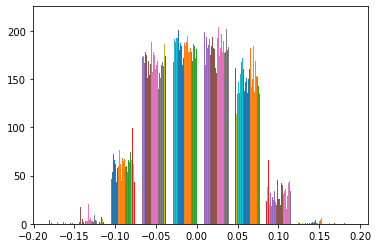

In [66]:
plt.hist(weight_0);

In [0]:
plt.....

1.1.2 Modify the former model to include $L_2$ regularization to every layer of the former model. Define a regularization parameter equal to 0.0001. 

In [0]:
from keras import regularizers
model.add(Dense(64, input_dim=64,
                kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))

In [77]:
seed(1)
#tf.random.set_seed(2)

from keras import regularizers


del model

model = Sequential()
model.add(Dense(128, input_dim=input_dim))
model.add(Activation('relu'),kernel_regularizer=regularizers.l2(l=0.0001))
model.add(Dense(64,Activation('relu'),kernel_regularizer=regularizers.l2(l=0.0001)))
model.add(Dense(32,Activation('relu'),kernel_regularizer=regularizers.l2(l=0.0001)))
model.add(Dense(16,Activation('relu'),kernel_regularizer=regularizers.l2(l=0.0001)))
model.add(Dense(nb_classes, activation='softmax'),kernel_regularizer=regularizers.l2(l=0.0001))


TypeError: ignored

Run the following cell to train and test the model

In [0]:
# or instantiate an optimizer before passing it to model.compile
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)
model.fit(X_trainN[:500,:], y_trainOHE[:500,:], epochs=1000, batch_size=16, validation_split=0, verbose=0)

preds = model.predict(X_testN, verbose=0)
preds = np.argmax(preds,axis=1)
Accuracy = np.mean(preds == y_test)
print('Accuracy = ', Accuracy*100, '%')

Create a graph with the histogram of the network weigths in the first hidden layer. Compare it with the histogram obtained in the previous exercise. Is there any effect due to the regularization?

In [0]:
plt.....

1.1.3 Define a new model using the keras sequential API including $L_1$ and $L_2$ regularization methods for every layer. Define a regularization parameter equal to 0.0001 for both regularization terms.

In [0]:
seed(1)
tf.random.set_seed(2)

del model
....

Run the following cell to train the model and estimate the accuracy.

In [0]:
# or instantiate an optimizer before passing it to model.compile
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)
model.fit(X_trainN[:500,:], y_trainOHE[:500,:], epochs=1000, batch_size=16, validation_split=0, verbose=0)

preds = model.predict(X_testN, verbose=0)
preds = np.argmax(preds,axis=1)
Accuracy = np.mean(preds == y_test)
print('Accuracy = ', Accuracy*100, '%')

Create a graph with the histogram of the network weigths in the first hidden layer. Compare it with the histograms obtained in the previous exercises. What is the effect of applying $L_1$ regularization?

### 1.2 Customized loss function

In [0]:
#Example MSE
from tensorflow.keras import backend as K

def mean_squared_error(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)

1.2.1 Use the backend component of keras (https://keras.io/backend/) to define the following loss function and use it to train the model.

$$\mathcal{L}({\bf{\hat{y}}},{\bf{y}}) = -\frac{1}{N}\sum_{i=1}^N \sum_{j=1}^C {\bf{1}}_{y_i \in C_j} w_{j}\log p_{model}[y_i \in C_j]$$

which corresponds to a weighted version of the categorical cross entropy loss function.

In [0]:
from tensorflow.keras import backend as K
def weighted_categorical_crossentropy(weights):
    ...

        
    def loss(y_true, y_pred):
        ...
        return loss
    
    return loss

1.2.2 Use the weighted categorical cross entropy function to train the MLP model with 3 layers defined at the begining of this document. Use the following weights = np.array([1,1,1,1,1,1,4,1,1,1]). Evaluate the model with the test dataset and plot the confusion matrix. 

In [0]:
weights = np.array([1,1,1,1,1,1,4,1,1,1])

In [0]:
del model
...

Train and validate the model. Compare the confusion matrix obtained using the weighted loss function with one obtained in the former class.

In [0]:
model.fit...

cm = confusion...

...
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Normalized confusion matrix')
